## Data Given For Tutorial - Created into CSVs in this notebook:

$$ \text{P(Score} = x \text{| race) (calculated)} $$

$$ \text{P(NonDefault | Race) (Pi Values)} $$

$$ \text{P(NonDefault | Score} \geq x \text{, race) (calculated)} $$

$$ \text{P(race) (Figure 9)} $$

**For Reference, all data is from here:**
### Figure 3A:
https://www.federalreserve.gov/boarddocs/rptcongress/creditscore/figtables3.htm#d3A
    
### Figure 7A:
https://www.federalreserve.gov/boarddocs/rptcongress/creditscore/figtables7.htm#d7A

### Figure 6A:
https://www.federalreserve.gov/boarddocs/rptcongress/creditscore/figtables6.htm#d6A

### Figure 9A:
https://www.federalreserve.gov/boarddocs/rptcongress/creditscore/datamodel_tables.htm

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

** For Naming Scheme Reference: **
- LEq: <=
- GEq: >=
- S: Score
- D: Default
- ND: NonDefault
- R: Race
- Eq: =

In [2]:
ProbNDGivenSEqXAndR = 1 - (pd.read_csv("Figure6A.csv").set_index("Score") / 100)
ProbSEqXGivenDAndNDAndR = pd.read_csv("Figure7A-fixed.csv").set_index("Score").diff().fillna(value=0) / 100
ProbSEqXGivenR = pd.read_csv("Figure3A.csv").set_index("Score").diff().fillna(value=0) / 100

***

## Calculating P(NonDefault | Race) - Pi Values

### Step 1: Caclulate :
$$ \text{P(Score} = x \text{| Default, race), and}$$
$$ \text{P(Score} = x \text{| NonDefault, race)}$$

In [3]:
ProbSEqXGivenDAndR = ProbSEqXGivenDAndNDAndR[['White (Default)', 
                                              'Black (Default)',
                                             'Hispanic (Default)',
                                             'Asian (Default)']]
ProbSEqXGivenNDAndR = ProbSEqXGivenDAndNDAndR[['White (NonDefault)', 
                                              'Black (NonDefault)',
                                             'Hispanic (NonDefault)',
                                             'Asian (NonDefault)']]
ProbSEqXGivenNDAndR.head()

,White (NonDefault),Black (NonDefault),Hispanic (NonDefault),Asian (NonDefault)
Score,,,,
0.0,0.0000,0.0000,0.0000,0.0000
0.5,0.0000,0.0002,0.0002,0.0000
1.0,0.0003,0.0035,0.0004,0.0006
1.5,0.0001,0.0008,0.0000,0.0000
2.0,0.0002,0.0011,0.0004,0.0003


In [4]:
ProbSEqXGivenDAndR.head()

,White (Default),Black (Default),Hispanic (Default),Asian (Default)
Score,,,,
0.0,0.0000,0.0000,0.0000,0.0000
0.5,0.0117,0.0188,0.0114,0.0075
1.0,0.0394,0.0668,0.0425,0.0387
1.5,0.0123,0.0181,0.0133,0.0096
2.0,0.0157,0.0224,0.0184,0.0107


In [5]:
ProbNDGivenSEqXAndR.head()

,White,Black,Hispanic,Asian
Score,,,,
0.0,0.0146,0.0033,0.0095,0.0523
0.5,0.0205,0.0077,0.0151,0.0552
1.0,0.0264,0.0120,0.0207,0.0581
1.5,0.0323,0.0164,0.0262,0.0610
2.0,0.0382,0.0207,0.0318,0.0639


In [6]:
ProbSEqXGivenNDAndR.columns = ['White', 'Black', 'Hispanic', 'Asian']
ProbSEqXGivenDAndR.columns = ['White', 'Black', 'Hispanic', 'Asian']

In [7]:
def getPi(raceName):
    return (-ProbNDGivenSEqXAndR[[raceName]] * 
            ProbSEqXGivenDAndR[[raceName]])/((ProbSEqXGivenNDAndR[[raceName]] 
                * ProbNDGivenSEqXAndR[[raceName]]) 
                - (ProbNDGivenSEqXAndR[[raceName]] 
                * ProbSEqXGivenDAndR[[raceName]]) 
                - ProbSEqXGivenNDAndR[[raceName]])

In [8]:
WhitePis = getPi('White')
BlackPis = getPi('Black')
AsianPis = getPi('Asian')
HispanicPis = getPi('Hispanic')

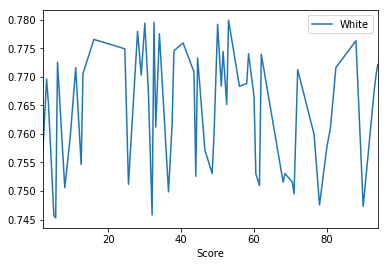

In [9]:
WhitePis[np.abs(WhitePis.White-WhitePis.White.mean()) <= (0.2*WhitePis.White.std())][1:].plot()

In [10]:
def getMedianAndMiddle(dataSet, Name, delta):
    pis = dataSet[np.abs(dataSet[[Name]]-dataSet[[Name]].mean()) <= (0.2*dataSet[[Name]].std())]
    length = len(pis)
    middle = pis.iloc[(int)(length/2.0) + delta]
    median = pis.median()
    return (middle,median)

In [11]:
getMedianAndMiddle(WhitePis, 'White', 1)

(White    0.779215
 Name: 50.0, dtype: float64, White    0.76675
 dtype: float64)

In [12]:
getMedianAndMiddle(BlackPis, 'Black', 0)

(Black    0.296411
 Name: 49.5, dtype: float64, Black    0.31438
 dtype: float64)

In [13]:
getMedianAndMiddle(AsianPis, 'Asian', 1)

(Asian    0.72709
 Name: 50.0, dtype: float64, Asian    0.732254
 dtype: float64)

In [14]:
getMedianAndMiddle(HispanicPis, 'Hispanic', 1)[1].values[0]

0.51859076433118856

In [15]:
piValues = [getMedianAndMiddle(WhitePis, 'White', 1)[1].values[0],
        getMedianAndMiddle(BlackPis, 'Black', 0)[1].values[0],
        getMedianAndMiddle(AsianPis, 'Asian', 1)[1].values[0],
        getMedianAndMiddle(HispanicPis, 'Hispanic', 1)[1].values[0]]
pis = pd.DataFrame(
    data=[piValues],
    columns=['white', 'black', 'asian', 'hispanic']
)

In [16]:
pis

,white,black,asian,hispanic
0,0.76675,0.31438,0.732254,0.518591


***

# Sensitivity: P(S>=x | NonDefault, race)

** They calculate this in the tutorial manually, but checking here to cross reference **

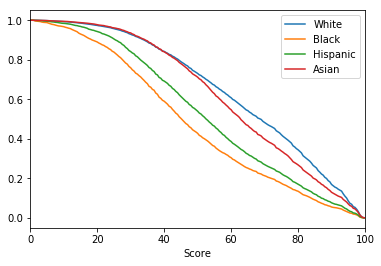

In [17]:
ProbSEqXGivenNDAndR.iloc[::-1].cumsum()[::-1].plot()

In [18]:
ProbSEqXGivenNDAndR.iloc[::-1].cumsum()[::-1].head()

,White,Black,Hispanic,Asian
Score,,,,
0.0,1.0000,1.0000,1.0000,1.0000
0.5,1.0000,1.0000,1.0000,1.0000
1.0,1.0000,0.9998,0.9998,1.0000
1.5,0.9997,0.9963,0.9994,0.9994
2.0,0.9996,0.9955,0.9994,0.9994


***

# Precision: P(NonDefault | Score >= x)
### Here: P(NonDefault | Score >= x, race)

In [19]:
ProbNDGivenSGEqXAndR = (((ProbSEqXGivenR * ProbNDGivenSEqXAndR).iloc[::-1].cumsum()[::-1]) / (ProbSEqXGivenR.iloc[::-1].cumsum()[::-1])).fillna(value=0)

In [20]:
ProbNDGivenSGEqXAndR.head()

,White,Black,Hispanic,Asian
Score,,,,
0.0,0.758748,0.336784,0.568169,0.806850
0.5,0.758748,0.336784,0.568169,0.806850
1.0,0.760599,0.340514,0.570725,0.807828
1.5,0.767284,0.354880,0.580569,0.813501
2.0,0.769297,0.359006,0.583533,0.814946


***

## Creating P(race)

In [21]:
sizes = [133165, 18274, 14702, 7906]
total = sum(sizes)
ProbOfBeingRace = pd.DataFrame(
    { 
    'Demographic' : ['white', 'black', 'hispanic', 'asian'],
    'P(race)' : [sizes[0]/total, sizes[1]/total, sizes[2]/total, sizes[3]/total]
    },
    columns=["Demographic", "P(race)"]
)

***

## Checking Final Answers for Tutorial w/ new values

In [22]:
sensitivities = ProbSEqXGivenNDAndR.iloc[::-1].cumsum()[::-1].round(2)
totalDF = pd.DataFrame({
    'sensitivity': np.arange(0.0, 1.01, 0.01).tolist()
})
# function to format the threshold scores to match the sensitivity value at the index
def getScoreArray(race, data):
    scores = [None] * 101
    for index, row in data.iterrows():
        sens = data.loc[index][race]
        if(len(totalDF[totalDF['sensitivity'] == sens].index.values) >= 1):
            i = totalDF[totalDF['sensitivity'] == sens].index.values[0]
            scores[i] = index
    return scores

demographics = ['White', 'Black', 'Asian', 'Hispanic']
for demographic in demographics:
    totalDF['t_' + demographic]  = getScoreArray(demographic, sensitivities[[demographic]])
    
totalDF.set_index('sensitivity')
def getPrecisionOrder(t_race, dataPrecision):
    prec = []
    for i in range(len(totalDF)):
        if(totalDF[t_race][i] != None):
            currPrec = dataPrecision[totalDF[t_race][i]]
            if(isinstance(currPrec, np.ndarray)):
                currPrec = 0
        prec.append(currPrec)
    return prec

precision = ProbNDGivenSGEqXAndR
for demographic in demographics:
    tmp = precision[demographic] * ProbOfBeingRace.set_index('Demographic').loc[demographic.lower()]['P(race)']
    totalDF[demographic[0] + '_prec'] = getPrecisionOrder('t_' + demographic, tmp)
    
totalDF.set_index('sensitivity', inplace=True)
totalDF['total_prec'] = totalDF[['W_prec', 'B_prec', 'A_prec', 'H_prec']].sum(axis=1)
closestPrecision = min(totalDF["total_prec"], key=lambda x:abs(x-0.82))
totalDF[totalDF['total_prec'] == closestPrecision]

,t_White,t_Black,t_Asian,t_Hispanic,W_prec,B_prec,A_prec,H_prec,total_prec
sensitivity,,,,,,,,,
0.98,19.0,7.5,20.5,13.0,0.664467,0.045717,0.040648,0.057455,0.808286


***

### Creating the CSVs for the Tutorial

In [23]:
ProbSEqXGivenR.to_csv('NEW_ProbSEqXGivenR.csv')

In [24]:
pis.set_index('white').to_csv('NEW_pis.csv')

In [25]:
ProbNDGivenSGEqXAndR.to_csv('NEW_ProbNDGivenSGEqXAndR.csv')

In [26]:
ProbOfBeingRace.set_index('Demographic').to_csv('NEW_ProbR.csv')